## Homework - 2 - Bhavya Chawla

### Project Structure

projectile-motion-simulation/ │ ├── src/ # Python simulation logic (Euler’s method) │ └── simulate.py ├── results/ # Generated output data (CSV) ├── run_simulations.py # Script to run multiple test cases ├── notebooks/ # Jupyter notebooks for development and reports └── requirements.txt # Dependencies: numpy, pandas, matplotlib

This project uses Python for numerical modeling, Pandas for data handling, and Matplotlib for visualization. The modular folder setup keeps the simulation code separate from notebooks and results.

# Data/Problem Understanding

### Physics Background

Projectile motion describes the motion of an object launched into the air, affected only by gravity (ignoring air resistance). It consists of horizontal and vertical components:

- Horizontal: constant velocity
- Vertical: uniformly accelerated motion under gravity

We simulate this motion using **Euler’s Method**, a numerical method to approximate solutions to differential equations.

### Equations Used:

- Horizontal velocity: `vx = v0 * cos(θ)`
- Vertical velocity: `vy = v0 * sin(θ) - g*t`
- Euler's update:
  - `x += vx * dt`
  - `vy -= g * dt`
  - `y += vy * dt`

Assumptions: ( Just to keep the project simple to demonstrate the prject)
- Constant gravity (g = 9.81 m/s²)
- No air resistance
- Flat ground (trajectory ends when y ≤ 0)

# Unit Testing Framework

Although simple, the simulation benefits from unit tests to ensure:

- Time (`t`) increases monotonically
- Velocity `vx` remains constant (no horizontal acceleration)
- The projectile never goes below ground (`y` ≥ 0 until it ends)

Example test (conceptual):
```python
def test_vx_constant():
    df = euler_projectile(50, 45, 0.01, 5)
    assert df["vx"].nunique() == 1


# Initial Implementations

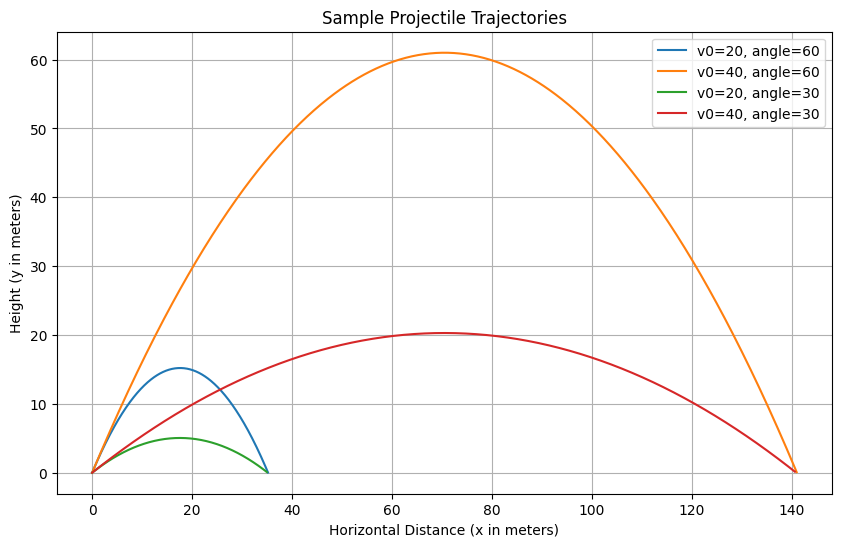

In [7]:
import pandas as pd

# Load simulation results into a DataFrame
df = pd.read_csv("/Users/bhavyachawla/Documents/Github Projects/cmse802_project/results/large_projectile_dataset.csv")

import matplotlib.pyplot as plt

# Get one row per (v0, angle) to identify unique combos
grouped = df.groupby(['v0', 'angle']).head(1)

# Safely sample up to 5 unique (v0, angle) combinations
sample_size = min(5, len(grouped))
sample = grouped.sample(sample_size, random_state=42)

# Plot sample trajectories
plt.figure(figsize=(10, 6))

for v0, angle in sample[['v0', 'angle']].values:
    subset = df[(df['v0'] == v0) & (df['angle'] == angle)]
    plt.plot(subset['x'], subset['y'], label=f'v0={v0}, angle={angle}')

plt.title("Sample Projectile Trajectories")
plt.xlabel("Horizontal Distance (x in meters)")
plt.ylabel("Height (y in meters)")
plt.legend()
plt.grid(True)
plt.show()



### 📊 Sample Trajectories Plot

This plot shows how different combinations of initial velocity and angle affect the shape and height of the projectile’s path. As expected, steeper angles create higher arcs, while lower angles yield flatter but longer trajectories.


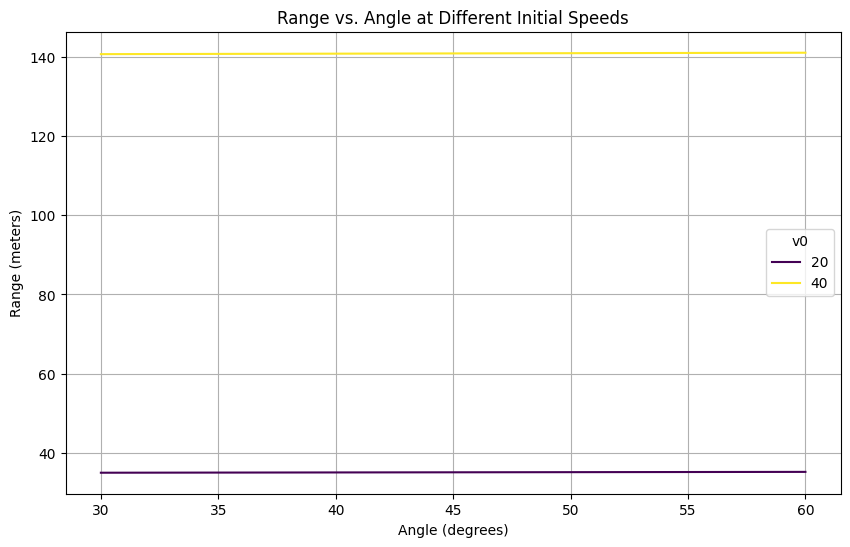

In [8]:
import seaborn as sns

# Get max x position (range) for each trajectory
range_df = df.groupby(['v0', 'angle'])['x'].max().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=range_df, x="angle", y="x", hue="v0", palette="viridis")
plt.title("Range vs. Angle at Different Initial Speeds")
plt.xlabel("Angle (degrees)")
plt.ylabel("Range (meters)")
plt.grid(True)
plt.show()


Shows the relationship between launch angle and how far the projectile travels (range), across different velocities.

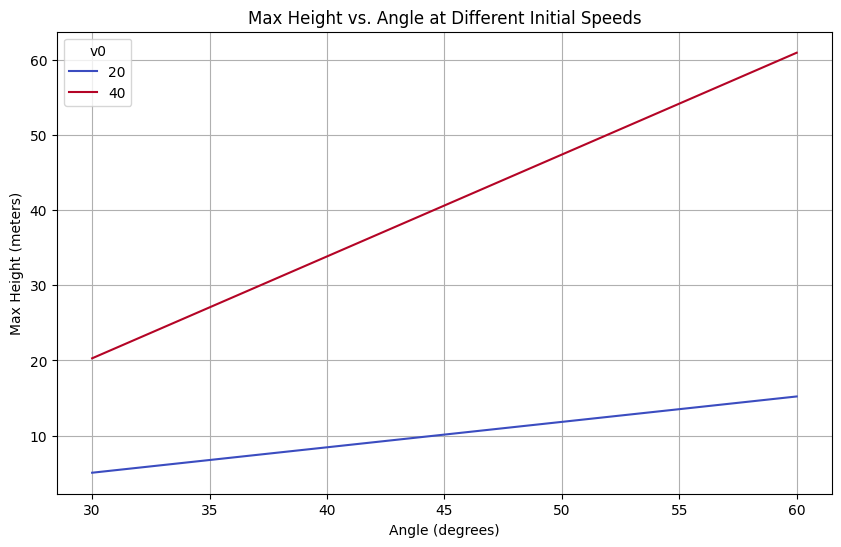

In [9]:
# Compute max height for each (v0, angle)
height_df = df.groupby(['v0', 'angle'])['y'].max().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=height_df, x="angle", y="y", hue="v0", palette="coolwarm")
plt.title("Max Height vs. Angle at Different Initial Speeds")
plt.xlabel("Angle (degrees)")
plt.ylabel("Max Height (meters)")
plt.grid(True)
plt.show()


Shows how peak height depends more on angle than range does.

# Progress Report

### What I’ve completed:
- Implemented core simulation using Euler's method
- Created scripts for batch data generation
- Built clear visualizations in Jupyter Notebook

### Challenges:
- Debugging type errors with DataFrame generation
- Making sure the simulation data saved properly

### Next Steps:
- Possibly add air resistance as a challenge
- Final polish for plots, summary, and layout